In [50]:
from matplotlib import pyplot as plt
import pandas as pd
df= pd.read_csv('assignment1.csv') #read csv

# Dazhong Dianping (大众点评）in Macau
I grabbed the information of 300 recommended restaurants in Macau on the website of Dazhong Dianping.

In [51]:
int_price=[]
for i in df['Average Price']:
    int_price.append(int(i))
df['Average Price']=int_price
int_remark=[]
import matplotlib
print(matplotlib.matplotlib_fname())

!open /Users/jieyi22/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc

/Users/jieyi22/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [52]:
import matplotlib as mpl
mpl.get_cachedir() #dind the path of cache
!open /Users/jieyi22/.matplotlib
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 1. What are the most popular food Tags in Macau?
It shows clearly from the chart that tags with 'Cantonese food','Snacks and fast food', 'Western food' rank the top three in the 300 restaurants, which means that those number of tags are related with people's eating habits in Macau.

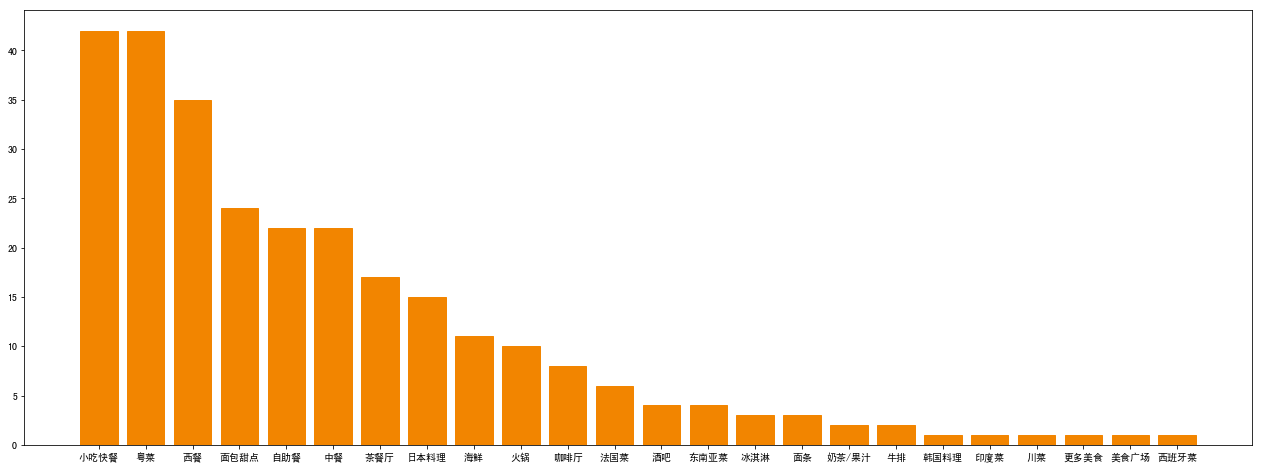

In [67]:
Tags_counts=df['Tags'].value_counts()[:299].sort_values(ascending=False) #sort values
Tags = pd.DataFrame(Tags_counts)
fig = plt.figure(figsize=(22,8)) #adjust size
ax=plt.bar(Tags.index, Tags["Tags"],color = '#f28500',edgecolor = '#f28500') #change color of the bars
ax.set_label('Tags Count')

# 2. Which restaurant owns the highest score of taste, envioronment and service in Macau??
The line graph illustrates the restaurants that with the scores in service, environment, and taste higher than nine. "巴黎轩" has the best service, environment and taste while comparing with others and "丽轩(丽思卡尔顿酒店店)" rank the second. Top three restaurants have the same service score, while the less have the same taste score.

In [68]:
df_score=df[
    (df['Taste'] > 9)
     & (df['Environment'] > 9)
     & (df['Service'] > 9)    #找到你感兴趣的
]
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from plotly.graph_objs import Scatter
init_notebook_mode(connected=True)  #离线显示

iplot([
    {"x":df_score['Shopname'],
    "y":df_score['Service'].sort_values(ascending=False)
    ,'name': 'Service Score'},
    {"x":df_score['Shopname'],
    "y":df_score['Environment'].sort_values(ascending=False)
    ,'name': 'Environment Score'},
    {"x":df_score['Shopname'],
        "y":df_score['Taste'].sort_values(ascending=False)
    ,'name': 'Taste Score'}
])

# 3.Whether remark and average price are related ?
From the scatter plot below, I found that the remark isn't influenced by the average price. Most of the restaurants have price that range from ¥0 to ¥250 and only one restaurant has the highest remark with a low price.

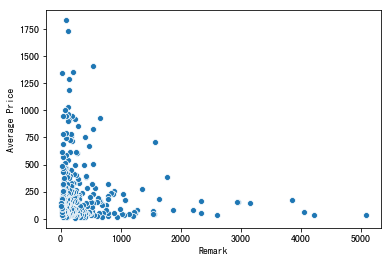

In [69]:
import seaborn as sns 
df_most_remark=df.sort_values(by='Remark',ascending=False).reset_index()
ax = sns.scatterplot(x='Remark', y='Average Price',data=df_most_remark)